In [102]:
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 4, 4

In [103]:
with open('Compas_SP_Experiments.pkl', 'rb') as handle:
    GF_Experiments = pickle.load(handle)


In [104]:
Summary = {}

In [105]:
true_sp = GF_Experiments['true_sp']
true_sp

0.15769243039732933

In [106]:
#Non_efficient_afa
non_efficient_afa = GF_Experiments['non-efficient_afa']
Exp_non_efficient_afa = non_efficient_afa['experiments']
Exp_non_efficient_afa.groupby(["Experiment"])["Estimated_Group_Fairness"].describe(percentiles=[])

,count,mean,std,min,50%,max
Experiment,,,,,,
1,10.0,0.158818,0.023084,0.116987,0.155982,0.194978
2,10.0,0.160059,0.011458,0.145347,0.156869,0.177253
3,10.0,0.154682,0.005327,0.145347,0.154801,0.163072
4,10.0,0.156071,0.015999,0.127622,0.159527,0.176366
5,10.0,0.154990,0.011424,0.136130,0.153855,0.177962
6,10.0,0.158641,0.009150,0.143575,0.159232,0.173707
7,10.0,0.157805,0.007711,0.148386,0.156995,0.170669
8,10.0,0.155273,0.004302,0.149335,0.155318,0.162629
9,10.0,0.160158,0.006046,0.148104,0.159921,0.168981


In [107]:
AFA_Mean_GF =[Exp_non_efficient_afa[Exp_non_efficient_afa["Experiment"] == i+1]["error"].mean() for i in range(10)]
AFA_std_GF = [Exp_non_efficient_afa[Exp_non_efficient_afa["Experiment"] == i+1]["error"].std() for i in range(10)]
AFA_lower_CI_GF = [AFA_Mean_GF[i] - 1.96* AFA_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]
AFA_upper_CI_GF = [AFA_Mean_GF[i] + 1.96* AFA_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]

In [108]:
#efficient_afa
efficient_afa = GF_Experiments['efficient_afa']
Exp_efficient_afa = efficient_afa['experiments']
AFA_efficient_Mean_GF =[Exp_efficient_afa[Exp_efficient_afa["Experiment"] == i+1]["error"].mean() for i in range(10)]
AFA_efficient_std_GF = [Exp_efficient_afa[Exp_efficient_afa["Experiment"] == i+1]["error"].std() for i in range(10)]

AFA_efficient_lower_CI_GF = [AFA_efficient_Mean_GF[i] - 1.96* AFA_efficient_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]
AFA_efficient_upper_CI_GF = [AFA_efficient_Mean_GF[i] + 1.96* AFA_efficient_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]


In [109]:
# baseline 1: iid
iid = GF_Experiments['iid']
Exp_iid = iid['experiments']

IID_Mean_GF = [Exp_iid[Exp_iid["Experiment"] == i+1]["error"].mean() for i in range(10)]
IID_std_GF = [Exp_iid[Exp_iid["Experiment"] == i+1]["error"].std() for i in range(10)]

IID_lower_CI_GF = [IID_Mean_GF[i] - 1.96* IID_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]
IID_upper_CI_GF = [IID_Mean_GF[i] + 1.96* IID_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]

In [110]:
#baseline 2 : zhang
zhang = GF_Experiments['cal_baselines']
zhang_audit = zhang['audit']
zhang_cal = zhang['cal']
zhang_random = zhang['random']

zhang_audit_avg = zhang_audit['audit_avg'] 
zhang_audit_std = zhang_audit['audit_std'] 

zhang_cal_avg = zhang_cal['cal_avg'] 
zhang_cal_std = zhang_cal['cal_std'] 

zhang_random_avg = zhang_random['random_avg'] 
zhang_random_std = zhang_random['random_std'] 

Summary['$\mu$CAL'] = {}
Summary['AFA'] = {}
Summary['uniform'] = {}
Summary['$\mu$CAL']["mean"] = zhang_random_avg
Summary['$\mu$CAL']["std"] = zhang_random_std
Summary['AFA']["mean"] = AFA_efficient_Mean_GF
Summary['AFA']["LCI"] =  [AFA_efficient_Mean_GF[i] - 1.96* AFA_efficient_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]
Summary['AFA']["UCI"] = [AFA_efficient_Mean_GF[i] + 1.96* AFA_efficient_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]


Summary['uniform']["mean"] = [Exp_iid[Exp_iid["Experiment"] == i+1]["error"].mean() for i in range(10)]
Summary['uniform']["LCI"] = [IID_Mean_GF[i] - 1.96* IID_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]
Summary['uniform']["UCI"] = [IID_Mean_GF[i] + 1.96* IID_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]


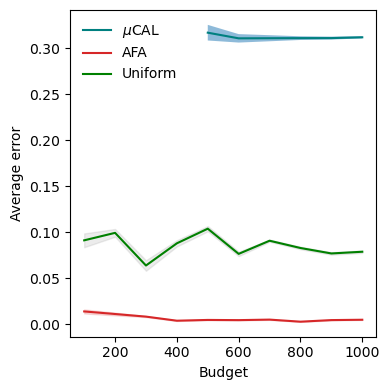

In [111]:
budgets_zhang = [500, 600, 800,900, 1000]
budgets = [100, 200, 300, 400, 500,600,700,800,900,1000]


plt.figure()
plt.plot(budgets_zhang, Summary['$\mu$CAL']["mean"], color='teal', label="$\mu$CAL")
plt.fill_between(budgets_zhang, Summary['$\mu$CAL']["mean"] - 1.96 / np.sqrt(50) *Summary['$\mu$CAL']["std"], Summary['$\mu$CAL']["mean"] + 1.96 / np.sqrt(50)*Summary['$\mu$CAL']["std"], alpha=0.5)

plt.plot(budgets, Summary['AFA']["mean"], color = 'C3', label="AFA")
plt.fill_between(budgets,Summary['AFA']["LCI"], Summary['AFA']["UCI"], color = 'C3', alpha =.15)

plt.plot(budgets, Summary['uniform']["mean"], color = 'green', label="Uniform")
plt.fill_between(budgets,Summary['uniform']["LCI"], Summary['uniform']["UCI"], color = 'grey', alpha =.15)


plt.legend(loc = "upper left",frameon=False,fontsize = 10)
plt.ylabel("Average error",fontsize=10)
plt.xlabel("Budget", fontsize=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.tight_layout()
#plt.title('Statistical Parity',fontsize=20)
plt.tight_layout()
#plt.savefig("GF_LG_33.pdf")
plt.show()

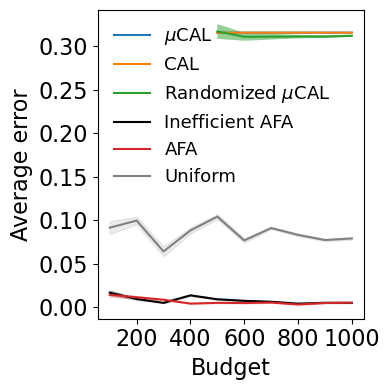

In [112]:
budgets_zhang = [500, 600, 800,900, 1000]
budgets = [100, 200, 300, 400, 500,600,700,800,900,1000]


plt.figure()
plt.plot(budgets_zhang, zhang_audit_avg, label="$\mu$CAL")
plt.plot(budgets_zhang, zhang_cal_avg, label="CAL")
plt.plot(budgets_zhang, zhang_random_avg, label="Randomized $\mu$CAL")

plt.fill_between(budgets_zhang, zhang_audit_avg - 1.96 / np.sqrt(50) * zhang_audit_std, zhang_audit_avg + 1.96 / np.sqrt(50) *zhang_audit_std, alpha=0.5)
plt.fill_between(budgets_zhang, zhang_cal_avg - 1.96 / np.sqrt(50)*zhang_cal_std, zhang_cal_avg + 1.96 / np.sqrt(50)*zhang_cal_std, alpha=0.5)
plt.fill_between(budgets_zhang, zhang_random_avg - 1.96 / np.sqrt(50) *zhang_random_std, zhang_random_avg + 1.96 / np.sqrt(50)*zhang_random_std, alpha=0.5)

plt.plot(budgets, AFA_Mean_GF, color = 'black', label="Inefficient AFA")
plt.fill_between(budgets,AFA_lower_CI_GF, AFA_upper_CI_GF, color = 'black', alpha =.15)

plt.plot(budgets, AFA_efficient_Mean_GF, color = 'C3', label="AFA")
plt.fill_between(budgets,AFA_efficient_lower_CI_GF, AFA_efficient_upper_CI_GF, color = 'C3', alpha =.15)

plt.plot(budgets, IID_Mean_GF, color = 'grey', label="Uniform")
plt.fill_between(budgets,IID_lower_CI_GF, IID_upper_CI_GF, color = 'grey', alpha =.15)


plt.legend(loc = "upper left",frameon=False,fontsize = 13)
plt.ylabel("Average error",fontsize=16)
plt.xlabel("Budget", fontsize=16)
plt.xticks(fontsize=16) 
plt.yticks(fontsize=16) 
plt.tight_layout()
#plt.title('Statistical Parity',fontsize=20)
plt.tight_layout()
plt.savefig("GF_LG_3.pdf")
plt.show()

In [113]:
print("Computation time for non efficient AFA is {}".format(GF_Experiments['non-efficient_afa']['computation_sp_afa']))
print("Computation time for efficient AFA is {}".format(GF_Experiments['efficient_afa']['computation_time_eff_afa']))
print("Computation time for  IID is {}".format(GF_Experiments['iid']['computation_sp_iid']))

print("Computation time for non efficient AFA is {}".format(GF_Experiments['non-efficient_afa']['computation_sp_afa']))
print("Computation time for efficient AFA is {}".format(GF_Experiments['efficient_afa']['computation_time_eff_afa']))
print("Computation time for  IID is {}".format(GF_Experiments['iid']['computation_sp_iid']))


Computation time for non efficient AFA is 16710.24671626091
Computation time for efficient AFA is 297.44968938827515
Computation time for  IID is 1.0511748790740967
Computation time for non efficient AFA is 16710.24671626091
Computation time for efficient AFA is 297.44968938827515
Computation time for  IID is 1.0511748790740967


In [114]:
GF_Experiments['cal_baselines']['audit']

{'audit_avg': array([0.31535685, 0.31535087, 0.31535331, 0.31535814, 0.31535078]),
 'audit_std': array([5.67626690e-04, 9.06096668e-05, 9.57706941e-05, 8.38235437e-05,
        9.12222994e-05])}

In [115]:
GF_Experiments['cal_baselines']['cal']

{'cal_avg': array([0.31520143, 0.31540179, 0.31539076, 0.31539538, 0.31535308]),
 'cal_std': array([5.67626690e-04, 9.06096668e-05, 9.57706941e-05, 8.38235437e-05,
        9.12222994e-05])}

In [116]:
GF_Experiments['cal_baselines']['random']

{'random_avg': array([0.31679205, 0.31064527, 0.3108822 , 0.31091868, 0.31177695]),
 'random_std': array([0.03065409, 0.01657539, 0.0072701 , 0.00580606, 0.00429732])}

In [117]:
GF_Experiments['non-efficient_afa']['experiments']

,Iteration,Experiment,Estimated_Group_Fairness,error
0,1,1,0.155982,0.001710
1,1,2,0.170162,0.012470
2,1,3,0.145347,0.012345
3,1,4,0.148892,0.008800
4,1,5,0.162363,0.004671
...,...,...,...,...
95,10,6,0.165436,0.007743
96,10,7,0.161553,0.003861
97,10,8,0.155096,0.002596
98,10,9,0.164648,0.006955


In [118]:
GF_Experiments['efficient_afa']['experiments']


,Iteration,Experiment,Estimated_Group_Fairness,error
0,1,1,0.152437,0.005255
1,1,2,0.194978,0.037285
2,1,3,0.154801,0.002892
3,1,4,0.159527,0.001835
4,1,5,0.165908,0.008216
...,...,...,...,...
95,10,6,0.154210,0.003483
96,10,7,0.159527,0.001835
97,10,8,0.156869,0.000824
98,10,9,0.154801,0.002892


In [119]:
GF_Experiments['iid']['experiments']

,Iteration,Experiment,Estimated_Group_Fairness,error
0,1,1,0.069307,0.088385
1,1,2,0.039801,0.117891
2,1,3,0.129568,0.028124
3,1,4,0.057357,0.100336
4,1,5,0.067864,0.089828
...,...,...,...,...
95,10,6,0.079867,0.077826
96,10,7,0.035663,0.122029
97,10,8,0.062422,0.095270
98,10,9,0.062153,0.095539


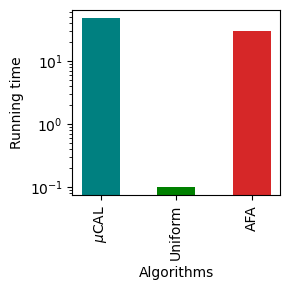

In [120]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 3, 3
import numpy as np
data = [ {'$\mu$CAL': 47.4},  {'Uniform': 0.1},{'AFA': 29.7}]

keys = [list(d.keys())[0] for d in data]
positions = np.arange(len(keys))
values = [list(d.values())[0] for d in data]
colors = ['teal', 'green', 'C3']



plt.bar(positions, values, color=colors,width=0.5, align='center')
plt.xlabel('Algorithms', fontsize=10)
plt.ylabel('Running time',fontsize=10)
#plt.title('Statistical parity running time')
plt.xticks(positions, keys,fontsize=10,rotation = 90)
plt.yticks(fontsize=10) 
plt.yscale('log')
plt.tight_layout()

#plt.savefig("SP_time_3.pdf")
plt.show()


In [121]:
zhang_audit_avg

array([0.31535685, 0.31535087, 0.31535331, 0.31535814, 0.31535078])

In [122]:
Summary
with open('bishwa_experiments.pkl', 'wb') as handle:
    pickle.dump(Summary, handle)

In [123]:
Summary

{'$\\mu$CAL': {'mean': array([0.31679205, 0.31064527, 0.3108822 , 0.31091868, 0.31177695]),
  'std': array([0.03065409, 0.01657539, 0.0072701 , 0.00580606, 0.00429732])},
 'AFA': {'mean': [0.014155269532097678,
   0.011369097055815746,
   0.008533056323825375,
   0.0041017426800904035,
   0.004942038518391858,
   0.004726734553317296,
   0.005291866915836366,
   0.003038227405594013,
   0.00476612400792828,
   0.005142274509364031],
  'LCI': [0.011971622808100192,
   0.009884760684228302,
   0.008007565860695696,
   0.003803130105965569,
   0.004610373737436466,
   0.004404369635155757,
   0.00498969452040612,
   0.0028367538001893124,
   0.00445636019412395,
   0.004917002742402995],
  'UCI': [0.016338916256095164,
   0.01285343342740319,
   0.009058546786955054,
   0.004400355254215238,
   0.00527370329934725,
   0.005049099471478836,
   0.005594039311266612,
   0.0032397010109987134,
   0.005075887821732609,
   0.005367546276325066]},
 'uniform': {'mean': [0.09135579673396299,
   0.